## Step 1 : - Data Import and Library¶

In [32]:

import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import timedelta

warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv(r"RFM data.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Step 2 :- Data Pre-Processing

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392735 non-null  int64  
 1   StockCode    392735 non-null  object 
 2   Description  392735 non-null  object 
 3   Quantity     392735 non-null  int64  
 4   InvoiceDate  392735 non-null  object 
 5   UnitPrice    392735 non-null  float64
 6   CustomerID   392735 non-null  float64
 7   Country      392735 non-null  object 
 8   TotalPrice   392735 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.0+ MB


In [35]:
df.shape

(392735, 9)

### Check Null Values

In [36]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

### Drop Duplicates

In [37]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
392730,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
392731,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
392732,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
392733,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [42]:
def exploration(data):
    print()
    print('Shape of dataset is',data.shape)
    print()
    print("-------------------------------------------------------------------------------")
    print('Info')
    print()
    print(data.info())
    print("-------------------------------------------------------------------------------")
    print('Statical info for Object columns')
    print()
    print(data.describe(include = 'object'))
    print()
    print('Statical info for contunious columns')
    print()
    print(data.describe())
    print("-------------------------------------------------------------------------------")
    print("Shape of data before treating duplicate records = ", data.shape)
    print()
    dupli = data[data.duplicated() == True]
    print('shape of duplicate data = ', dupli.shape)
    print()
    if dupli.shape[0] > 0:
        data = data.drop_duplicates()
        print("Shape of data after treating duplicate records = ", data.shape)
        print()
    else:
        data = data
        print()
        print(">>>>>>>> As there are no duplicate rows in the dataset so the  <<<<<<<<")
        print()
        print("                   Shape of data = ", data.shape)
        
    print("-------------------------------------------------------------------------------")
    print('Checking for nulls in dataset ')
    print()
    print(data.isnull().sum()[data.isnull().sum() > 0])
    print()
    print("shape of data",data.shape[0])
    data = data.dropna()
    print("shape of data",data.shape[0])
    
    return data



In [43]:
df = exploration(df)
df


Shape of dataset is (387553, 9)

-------------------------------------------------------------------------------
Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387553 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    387553 non-null  int64  
 1   StockCode    387553 non-null  object 
 2   Description  387553 non-null  object 
 3   Quantity     387553 non-null  int64  
 4   InvoiceDate  387553 non-null  object 
 5   UnitPrice    387553 non-null  float64
 6   CustomerID   387553 non-null  float64
 7   Country      387553 non-null  object 
 8   TotalPrice   387553 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 29.6+ MB
None
-------------------------------------------------------------------------------
Statical info for Object columns

       StockCode                         Description          InvoiceDate  \
count     387553                      

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
392730,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
392731,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
392732,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
392733,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [44]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
392730,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
392731,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
392732,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
392733,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## Identify the unique customer

In [47]:
len(list(df['CustomerID'].unique()))

4298

In [48]:
print('{:,} rows; {:,} columns'
      .format(df.shape[0], df.shape[1]))

print('{:,} transactions don\'t have a CustomerID'
      .format(df[df.CustomerID.isnull()].shape[0]))

print('Transactions timeframe from {} to {}'.format(df['InvoiceDate'].min(),
                                    df['InvoiceDate'].max()))

387,553 rows; 9 columns
0 transactions don't have a CustomerID
Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [49]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, yearfirst=True)

In [50]:
# Create snapshot date
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

2011-12-10 12:50:00


## Step 3 : - Model Building RFM

In [51]:
# Grouping by CustomerID
data_process = df.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalPrice': 'sum'})

In [52]:
data_process.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12347.0,2,181,4060.40
12348.0,75,27,1437.24
12349.0,19,71,1417.60
12350.0,310,16,294.40
12352.0,36,77,1385.74


### Rename

In [53]:
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalPrice': 'MonetaryValue'}, inplace=True)

data_process

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,2,181,4060.40
12348.0,75,27,1437.24
12349.0,19,71,1417.60
12350.0,310,16,294.40
12352.0,36,77,1385.74
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [54]:
print(data_process.head())
print('{:,} rows; {:,} columns'.format(data_process.shape[0], data_process.shape[1]))

            Recency  Frequency  MonetaryValue
CustomerID                                   
12347.0           2        181        4060.40
12348.0          75         27        1437.24
12349.0          19         71        1417.60
12350.0         310         16         294.40
12352.0          36         77        1385.74
4,298 rows; 3 columns


In [55]:
# Create labels for Recency  
r_labels = range(5, 0, -1)  # 5, 4 , 3 , 2 , 1  more recent--- get higher number

# Create labels for Frequency

f_labels = range(1, 6)      # 1 , 2 ,3 ,4,5  more frequent--- get higher number

# Create labels for MonetaryValue
m_labels = range(1, 6)  # 1 , 2 ,3 ,4,5    more spend---- get higher number


# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=5, labels=r_labels)


# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=5, labels=f_labels)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=5, labels=m_labels)


# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)


data_process.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12347.0,2,181,4060.40,5,5,5
12348.0,75,27,1437.24,2,2,4
12349.0,19,71,1417.60,4,4,4
12350.0,310,16,294.40,1,2,2
12352.0,36,77,1385.74,3,4,4


In [56]:
data_process['RFM_Segment_Concat'] = data_process.R.astype(str) + data_process.F.astype(str) + data_process.M.astype(str)
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
12347.0,2,181,4060.40,5,5,5,555
12348.0,75,27,1437.24,2,2,4,224
12349.0,19,71,1417.60,4,4,4,444
12350.0,310,16,294.40,1,2,2,122
12352.0,36,77,1385.74,3,4,4,344


In [57]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

114


In [58]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score
CustomerID,,,,,,,,
12347.0,2,181,4060.40,5,5,5,555,15
12348.0,75,27,1437.24,2,2,4,224,8
12349.0,19,71,1417.60,4,4,4,444,12
12350.0,310,16,294.40,1,2,2,122,5
12352.0,36,77,1385.74,3,4,4,344,11


In [59]:
# Define rfm_level function
def rfm_level(df):
    r_score, f_score, m_score = df['R'], df['F'], df['M']
    
    if (4 <= r_score <= 5) and (4 <= f_score <= 5) and (4 <= m_score <= 5):
        return 'Champions'
    elif (3 <= r_score <= 5) and (3 <= f_score <= 5) and (3 <= m_score <= 5):
        return 'Loyal customers'
    elif (4 <= r_score <= 5) and (2 <= f_score <= 3) and (2 <= m_score <= 3):
        return 'Potential loyalist'
    elif (4 <= r_score <= 5) and (1 <= f_score <= 2) and (1 <= m_score <= 2):
        return 'Recent customers'
    elif (4 <= r_score <= 5) and (1 <= f_score <= 2) and (1 <= m_score <= 2):
        return 'Promising'
    elif (3 <= r_score <= 5) and (3 <= f_score <= 5) and (3 <= m_score <= 5):
        return 'Needs attention'
    elif (1 <= r_score <= 2) and (1 <= f_score <= 2) and (1 <= m_score <= 2):
        return 'About to sleep'
    elif (2 <= r_score <= 5) and (1 <= f_score <= 3) and (1 <= m_score <= 3):
        return 'At risk'
    elif (1 <= r_score <= 3) and (4 <= f_score <= 5) and (4 <= m_score <= 5):
        return "Can't lose them"
    elif (1 <= r_score <= 2) and (1 <= f_score <= 2) and (1 <= m_score <= 2):
        return 'Hibernating'
    else:
        return 'Other'

In [60]:
rfm['Customer_Segment'] = rfm.apply(rfm_level, axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,Customer_Segment
CustomerID,,,,,,,,,
12347.0,2,181,4060.40,5,5,5,555,15,Champions
12348.0,75,27,1437.24,2,2,4,224,8,Other
12349.0,19,71,1417.60,4,4,4,444,12,Champions
12350.0,310,16,294.40,1,2,2,122,5,About to sleep
12352.0,36,77,1385.74,3,4,4,344,11,Loyal customers


### Unique RFM Segment Count

In [65]:
rfm.RFM_Segment_Concat.nunique()

114

In [66]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
rfm_level_agg

Recency Frequency MonetaryValue      
                      mean      mean          mean count
Customer_Segment                                        
About to sleep       217.7      12.6         221.1   882
At risk               73.0      25.3         405.2   602
Can't lose them      135.3     117.7        2097.2   197
Champions             13.0     254.3        4956.5   923
Loyal customers       35.8      89.3        1440.4   784
Other                162.1      47.9         871.7   549
Potential loyalist    17.4      27.6         412.3   186
Recent customers      18.0      10.0         177.2   175

In [67]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_level_agg

,RecencyMean,FrequencyMean,MonetaryMean,Count
Customer_Segment,,,,
About to sleep,217.7,12.6,221.1,882
At risk,73.0,25.3,405.2,602
Can't lose them,135.3,117.7,2097.2,197
Champions,13.0,254.3,4956.5,923
Loyal customers,35.8,89.3,1440.4,784
Other,162.1,47.9,871.7,549
Potential loyalist,17.4,27.6,412.3,186
Recent customers,18.0,10.0,177.2,175


<AxesSubplot:xlabel='Customer_Segment'>

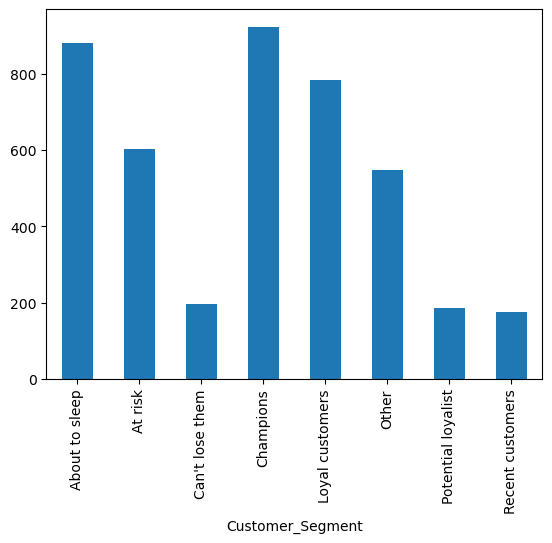

In [73]:
rfm_level_agg.Count.plot(kind = 'bar')

<AxesSubplot:xlabel='Customer_Segment'>

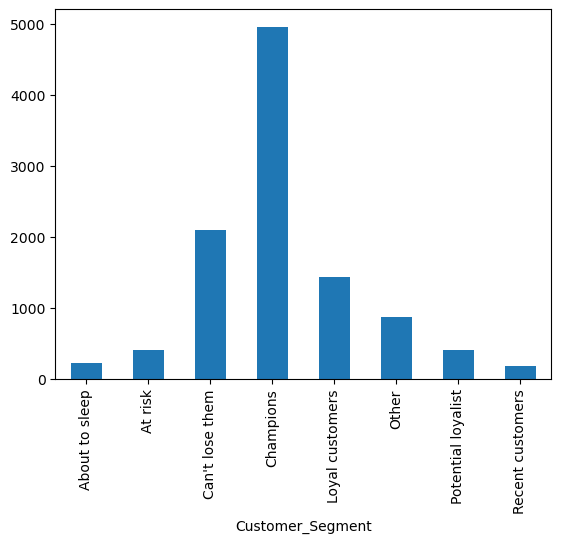

In [74]:
rfm_level_agg.MonetaryMean.plot(kind = 'bar')

<AxesSubplot:xlabel='Customer_Segment'>

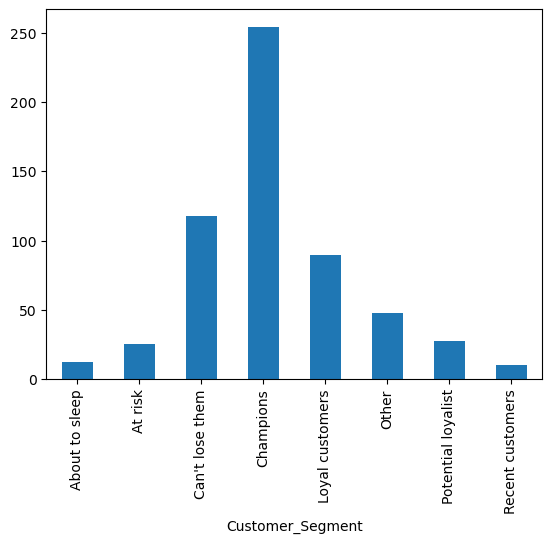

In [75]:
rfm_level_agg.FrequencyMean.plot(kind = 'bar')

<AxesSubplot:xlabel='Customer_Segment'>

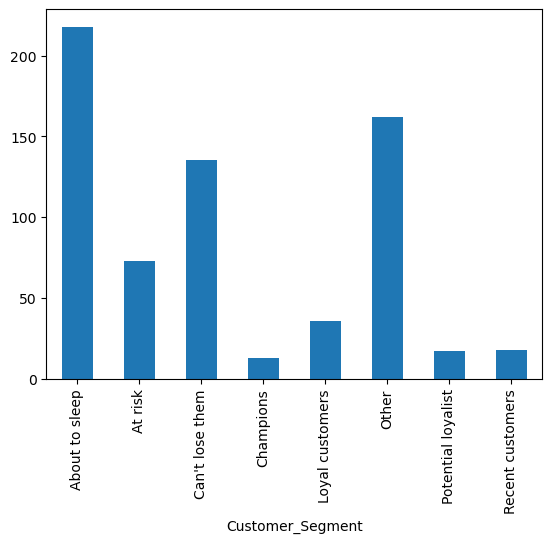

In [76]:
rfm_level_agg.RecencyMean.plot(kind = 'bar')

### Percentage of Champions Customers

In [77]:
923/(882+602+197+923+784+549+186+175)*100 

21.4751046998604

### Champions Customer Transaction amount in %

In [78]:
(4956.5 * 923)*100/((4956.5 * 923) +(221.1*882)+(405.2*602)+(2097.2*197)+(1440.4*784)+(871.7*549)+(412.3*186)+(177.2*175))

64.05133588740661

## Conclusion

 * The RFM (Recency, Frequency, Monetary) model is a customer segmentation technique that categorizes customers based on     their transactional behavior. 
 

 * While the RFM model doesn't explicitly follow the exact percentages of the Pareto Principle (80/20 rule)

## Strategy

 * Segment: Champions


 * Strategy: VIP Treatment:

    Treat these customers like VIPs. Provide them with priority customer service, special offers, and unique experiences to     make them feel valued
 
 


 * Segment:Can't lose them
       
    
  * Strategy:   Exclusive Offers:

 * Create exclusive offers and promotions specifically for this segment. This could include limited-time discounts, buy-       one-get-one-free deals, or other special perks

 * Segment:Loyal customers
        
        
 * Personalized Communication:
 

 * Tailor your communication to individual preferences. Use customer data to send personalized emails, offers, and recommendations based on their purchase history and preferences.